In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/bank-customer-churn-prediction/Churn_Modelling.csv


In [2]:
df  = pd.read_csv("/kaggle/input/bank-customer-churn-prediction/Churn_Modelling.csv")

In [3]:
df.head()

,RowNumber,CustomerId,Surname,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,1,15634602,Hargrave,619,France,Female,42,2,0.00,1,1,1,101348.88,1
1,2,15647311,Hill,608,Spain,Female,41,1,83807.86,1,0,1,112542.58,0
2,3,15619304,Onio,502,France,Female,42,8,159660.80,3,1,0,113931.57,1
3,4,15701354,Boni,699,France,Female,39,1,0.00,2,0,0,93826.63,0
4,5,15737888,Mitchell,850,Spain,Female,43,2,125510.82,1,1,1,79084.10,0


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 14 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   RowNumber        10000 non-null  int64  
 1   CustomerId       10000 non-null  int64  
 2   Surname          10000 non-null  object 
 3   CreditScore      10000 non-null  int64  
 4   Geography        10000 non-null  object 
 5   Gender           10000 non-null  object 
 6   Age              10000 non-null  int64  
 7   Tenure           10000 non-null  int64  
 8   Balance          10000 non-null  float64
 9   NumOfProducts    10000 non-null  int64  
 10  HasCrCard        10000 non-null  int64  
 11  IsActiveMember   10000 non-null  int64  
 12  EstimatedSalary  10000 non-null  float64
 13  Exited           10000 non-null  int64  
dtypes: float64(2), int64(9), object(3)
memory usage: 1.1+ MB


In [5]:
df.duplicated().sum()

0

to check no of rows diplicated

In [7]:
df['Exited'].value_counts()

Exited
0    7963
1    2037
Name: count, dtype: int64

lets check geography

In [11]:
df['Geography'].value_counts()

Geography
France     5014
Germany    2509
Spain      2477
Name: count, dtype: int64

In [12]:
df['Gender'].value_counts()

Gender
Male      5457
Female    4543
Name: count, dtype: int64

now let us remove some unwanted columns like " RowNumber	CustomerId	Surname	"

In [16]:
df.drop(columns=["RowNumber",	"CustomerId",	"Surname"],inplace=True)

In [20]:
df

,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,619,France,Female,42,2,0.00,1,1,1,101348.88,1
1,608,Spain,Female,41,1,83807.86,1,0,1,112542.58,0
2,502,France,Female,42,8,159660.80,3,1,0,113931.57,1
3,699,France,Female,39,1,0.00,2,0,0,93826.63,0
4,850,Spain,Female,43,2,125510.82,1,1,1,79084.10,0
...,...,...,...,...,...,...,...,...,...,...,...
9995,771,France,Male,39,5,0.00,2,1,0,96270.64,0
9996,516,France,Male,35,10,57369.61,1,1,1,101699.77,0
9997,709,France,Female,36,7,0.00,1,0,1,42085.58,1
9998,772,Germany,Male,42,3,75075.31,2,1,0,92888.52,1


for cateogrical columns lets do one hot encoding


In [30]:
df1 =pd.get_dummies(df,columns=['Geography','Gender'],drop_first=True)
# df['Geography_Germany']=df['Geography_Germany'].astype(int)
# df['Geography_Germany'] = df['Geography_Germany'].replace({True: 1, False: 0})


In [32]:
df1['Geography_Germany'] = df1['Geography_Germany'].replace({True: 1, False: 0})
df1['Geography_Spain'] = df1['Geography_Spain'].replace({True: 1, False: 0})
df1['Gender_Male'] =df1['Gender_Male'].replace({True:1,False:0})
df1

,CreditScore,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited,Geography_Germany,Geography_Spain,Gender_Male
0,619,42,2,0.00,1,1,1,101348.88,1,0,0,0
1,608,41,1,83807.86,1,0,1,112542.58,0,0,1,0
2,502,42,8,159660.80,3,1,0,113931.57,1,0,0,0
3,699,39,1,0.00,2,0,0,93826.63,0,0,0,0
4,850,43,2,125510.82,1,1,1,79084.10,0,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...
9995,771,39,5,0.00,2,1,0,96270.64,0,0,0,1
9996,516,35,10,57369.61,1,1,1,101699.77,0,0,0,1
9997,709,36,7,0.00,1,0,1,42085.58,1,0,0,0
9998,772,42,3,75075.31,2,1,0,92888.52,1,1,0,1


lets scale the vlaues of balacne, EstimatedSalary, in order to get well converged weights

In [33]:
# lets create x,y

x = df1.drop(columns=['Exited'])
y = df1['Exited']

In [35]:
from sklearn.model_selection import train_test_split

x_train,x_test, y_train, y_test = train_test_split(x,y,test_size=0.2)

In [38]:
x_train.shape

(8000, 11)

In [40]:
y_train.shape

(8000,)

In [43]:
from sklearn.preprocessing import StandardScaler

scaler  =StandardScaler()
x_train_scaled = scaler.fit_transform(x_train)
x_test_sclaed =scaler.fit_transform(x_test)

In [103]:
# lets import all stuf required for ANN

from tensorflow import keras
from tensorflow.keras import Sequential
from tensorflow.keras.layers import Dense,Dropout

In [105]:
model = Sequential()
model.add(Dense(33,activation='relu',input_dim=11))
model.add(Dropout(0.3))
model.add(Dense(11,activation='relu'))
model.add(Dropout(0.3))
model.add(Dense(7,activation='relu'))
model.add(Dense(1,activation='sigmoid'))


**1. 11 inputs**
**2. 1st dense layers has 3 neurons**
3. > 11*3 = 33 weights , 3 biases , >>> 36 parameters in total4. 




In [94]:

# 1. 11 inputs
# 2. 1st dense layers has 3 neurons
# 3. > 11*3 = 33 weights , 3 biases , >>> 36 parameters in total4. 
# 4 same with 2nd dense layer 4 paramerte

In [106]:
model.summary()

Model: "sequential_10"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ dense_22 (Dense)                │ (None, 33)             │           396 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_2 (Dropout)             │ (None, 33)             │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_23 (Dense)                │ (None, 11)             │           374 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_3 (Dropout)             │ (None, 11)             │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_24 (Dense)                │ (None, 7)              │            84 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_25 (Dense)                │ (None, 1)              │             8 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 862 (3.37 KB)

 Trainable params: 862 (3.37 KB)

 Non-trainable params: 0 (0.00 B)

In [107]:
model.compile(loss ='binary_crossentropy',optimizer = 'Adam',metrics=['accuracy'])

In [108]:
history = model.fit(x_train, y_train,epochs = 100,validation_split=0.2)

Epoch 1/100
200/200 ━━━━━━━━━━━━━━━━━━━━ 2s 3ms/step - accuracy: 0.6352 - loss: 830.3627 - val_accuracy: 0.7850 - val_loss: 2.0545
Epoch 2/100
200/200 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.7624 - loss: 73.6899 - val_accuracy: 0.6881 - val_loss: 1.0164
Epoch 3/100
200/200 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.7672 - loss: 25.3396 - val_accuracy: 0.7856 - val_loss: 0.6952
Epoch 4/100
200/200 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.7886 - loss: 11.1835 - val_accuracy: 0.7856 - val_loss: 0.5597
Epoch 5/100
200/200 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.7792 - loss: 8.1456 - val_accuracy: 0.7856 - val_loss: 0.5449
Epoch 6/100
200/200 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.7938 - loss: 4.5385 - val_accuracy: 0.7856 - val_loss: 0.5353
Epoch 7/100
200/200 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.7871 - loss: 2.9899 - val_accuracy: 0.7856 - val_loss: 0.5288
Epoch 8/100
200/200 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.7989 - loss: 3.1764 - val

In [109]:
model.layers[0].get_weights()
# bellow are the 33 weights, 3 biases of 3 neuron  for 1st layer

[array([[-2.15057269e-01, -4.62055594e-01,  1.41481506e-02,
         -1.70345515e-01, -3.17462534e-02,  2.85110921e-02,
         -1.41815171e-01,  1.37506932e-01, -3.08654219e-01,
         -2.87226290e-01,  2.50005543e-01,  3.67565453e-01,
         -4.19375092e-01, -2.67872036e-01, -6.60196245e-02,
         -2.46391505e-01,  2.16657162e-01, -4.21063006e-02,
          1.30114406e-01,  2.37744555e-01,  1.23446025e-01,
         -2.40871966e-01, -2.30351642e-01, -3.13417047e-01,
         -2.08105613e-02,  1.18369684e-01, -2.91591793e-01,
          3.99630368e-01, -1.92607176e-02, -1.13995589e-01,
          2.97260344e-01,  2.03156561e-01,  1.56821862e-01],
        [ 1.90459311e-01,  2.81495377e-02, -2.88467079e-01,
         -3.64972740e-01, -1.50517717e-01, -2.39802495e-01,
          1.17815375e-01, -1.33111728e-02,  1.11814044e-01,
         -1.48070753e-02,  7.34350681e-02, -1.37976795e-01,
         -2.96901613e-01, -2.18729690e-01, -3.24657947e-01,
         -4.95517626e-02, -1.65614352e-

In [86]:
model.layers[1].get_weights()
# below are the 3 weights, 1 biases in 2nd layer

[array([[-0.02721224,  0.2937262 ,  0.00206149,  0.09284365, -0.04038982,
          0.05649728,  0.14692771,  0.3043242 , -0.4077375 ,  0.06842265,
          0.24306376],
        [-0.21439959, -0.43605992, -0.03907518,  0.16268243,  0.19967182,
          0.19518793, -0.5159924 , -0.38811305, -0.02535123, -0.1360127 ,
          0.38627213],
        [ 0.6384452 ,  0.28351638, -0.46863762,  0.36466637,  0.00395891,
          0.38181078, -0.15063748,  0.51295334, -0.39860892,  0.29853064,
          0.1855782 ],
        [-0.3581259 ,  0.26843914, -0.56090194, -0.14774008,  0.09607937,
         -0.24335873,  0.22014081, -0.5040006 , -0.3677526 , -0.1081419 ,
          0.44708586],
        [ 0.61309737, -0.29827827,  0.2537569 , -0.3078822 , -0.26206738,
          0.01760435, -0.26107627,  0.29589885, -0.22472069, -0.29974258,
         -0.3612756 ],
        [-0.3565732 , -0.23322283,  0.2796104 , -0.13858463, -0.38593152,
          0.03021687,  0.01920366,  0.1613598 ,  0.22913808, -0.0520857

In [110]:
y_log = model.predict(x_test_sclaed)

63/63 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step  


In [111]:
y_pred = np.where(y_log>0.5,1,0)

In [112]:
from sklearn.metrics import accuracy_score
accuracy_score(y_test,y_pred)

0.787

In [78]:
# how to get good accuray

# 1. increase epochs
# 2. change actoivation function
# 3. increase no of neurons

In [113]:
import matplotlib.pyplot as plt

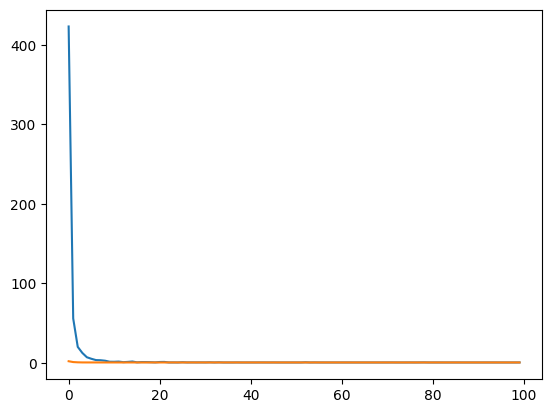

In [116]:
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])


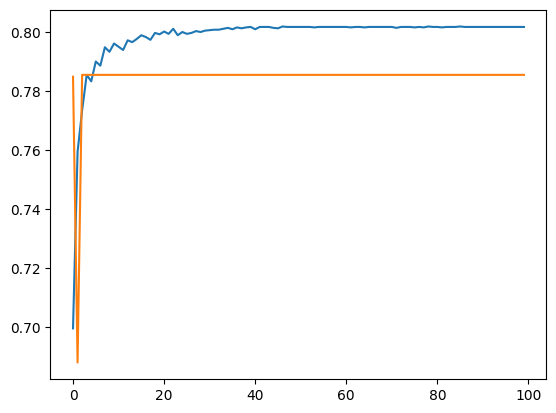

In [117]:
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])